In [1]:
#Pickle Code is in Notebook 1.4 Content Based Recommendations
#1.2 and 1.3 Notebooks Making Beer Recommendations are good models too

In [2]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162665 sha256=bcacf49815c02316d694783a440bbdadbfb4379bcebc93af566e53e81d2c66e0
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# --
from surprise import Dataset, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

from surprise import Dataset, Reader, BaselineOnly, accuracy
from surprise.model_selection import train_test_split
import pandas as pd
from surprise import accuracy

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
column_names = ['user_id', 'song_id', 'play_count']
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 1- Music Recommender/kaggle_visible_evaluation_triplets.txt", sep='\t', names=column_names)
df = df.sample(10000)
df.head()


,user_id,song_id,play_count
200521,e9537d16ab7d6ef5d60c81bceae6ee80f06ee05c,SOJYNZE12AF72AC894,1
462559,dae04733be8470fecad5dfa05032ad73fd232d8c,SOBZMWE12B0B80AEA4,3
51790,0a13ef57b89295c0f05ce3d1d7991e4d50edb04c,SOIMRLG12A6D4F5031,1
1238501,70f60a88c6d92e6ac6a26dcd79532744b8a2857f,SOMGIYR12AB0187973,1
233400,43870977dd4bca6262159d589f48eec1e18b3427,SONJILQ12A67020456,1


#Finding Tracks in Song Database

In [6]:
df_tracks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 1- Music Recommender/unique_tracks.txt',
                       sep='<SEP>', names=['track_id','song_id','artist_name','song'], engine='python')

In [7]:
df_tracks.query('artist_name.str.lower() == "led zeppelin"')

,track_id,song_id,artist_name,song
11836,TRMFYAW128F4270F35,SOPEUKZ12A8C13B4D7,Led Zeppelin,"Black Dog (""In Concert"" Live Version From BBC..."
27644,TRMJLZG128F42229BF,SOIGCJY12A6D4FC7C0,Led Zeppelin,Over The Hills And Far Away (2007 Remastered L...
42099,TRWGFHX128F4270F1D,SOHJIJB12A8C13A5A0,Led Zeppelin,"I Can't Quit You Baby ( ""Top Gear"" Live Versi..."
47940,TRWBROP128F4292167,SOVLXAU12A8C13F5F4,Led Zeppelin,Houses Of The Holy (2007 Remastered Album Vers...
71676,TRWOINY128F42989D4,SOXPREO12A8C13EACD,Led Zeppelin,Dazed And Confused (Live Album Version)
...,...,...,...,...
957486,TRKXRAF128F42989DF,SOUIYYD12A8C13EAE8,Led Zeppelin,Whole Lotta Love (Live Album Version)
961460,TRKYOVQ128F4298956,SOOEAYQ12CF5F86D5D,Led Zeppelin,Black Dog (Album Version)
969784,TRYRZHB128F42776FF,SOVYQRV12A8C13C048,Led Zeppelin,Gallows Pole (Album Version)
978645,TRYAIJZ128F42954E5,SOCQIJP12A8C14235E,Led Zeppelin,Interview By Barney Hoskyns - Part 2 (Part 2 o...


*   Dammit Blink 182 (Blink 182)- SOTWNVF12AB0188451
*   What's My Age Again (Blink 182)- SONOGEQ12D021B2A40
*   Fade to Black (Metallica)- SOQDMXT12A6D4F8255
*   Black Dog (Led Zeppelin)- SOOEAYQ12CF5F86D5D
*   Dazed and Confused (Led Zeppelin)-SOXPREO12A8C13EAC


#Continue

In [8]:
mydf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 1- Music Recommender/my_songs.csv")
mydf

,user_id,song_id,play_count
0,NIK B,SOTWNVF12AB0188451,10
1,NIK B,SONOGEQ12D021B2A40,10
2,NIK B,SOQDMXT12A6D4F8255,10
3,NIK B,SOOEAYQ12CF5F86D5D,10
4,NIK B,SOXPREO12A8C13EAC,10
5,MARY M,SOYOWJK12AB017B9C9,10
6,MARY M,SOZNINK12A8C1358B6,10
7,MARY M,SOJRFWQ12AB0183582,10
8,MARY M,SOOQBJF12A6D4FA8CA,10
9,MARY M,SOYOWJK12AB017B9C9,10


In [9]:
df = pd.concat([df,mydf],axis=0)
df.head()

,user_id,song_id,play_count
200521,e9537d16ab7d6ef5d60c81bceae6ee80f06ee05c,SOJYNZE12AF72AC894,1
462559,dae04733be8470fecad5dfa05032ad73fd232d8c,SOBZMWE12B0B80AEA4,3
51790,0a13ef57b89295c0f05ce3d1d7991e4d50edb04c,SOIMRLG12A6D4F5031,1
1238501,70f60a88c6d92e6ac6a26dcd79532744b8a2857f,SOMGIYR12AB0187973,1
233400,43870977dd4bca6262159d589f48eec1e18b3427,SONJILQ12A67020456,1


In [10]:
df['play_count'].value_counts().nlargest(10)

1     5849
2     1477
3      619
5      512
4      359
6      229
7      156
10     110
8      102
9       75
Name: play_count, dtype: int64

In [11]:
# Define bins and labels
bins = [1, 2, 3, 4, 5,6,7,8,9,10, float('inf')]
labels = [1, 2, 3, 4, 5,6,7,8,9,10]

# Bin the 'play_count' column
df['play_count_binned'] = pd.cut(df['play_count'], bins=bins, labels=labels, right=False)
df['play_count_binned'].value_counts()

1     5849
2     1477
10     632
3      619
5      512
4      359
6      229
7      156
8      102
9       75
Name: play_count_binned, dtype: int64

In [12]:
print(f"No. of unique users: {df['user_id'].nunique()}")
print(f"No. of unique songs: {df['song_id'].nunique()}")
print(f"No. of unique play counts: {df['play_count'].nunique()}")

No. of unique users: 9443
No. of unique songs: 7536
No. of unique play counts: 75


In [13]:
df_tracks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 1- Music Recommender/unique_tracks.txt',
                       sep='<SEP>', names=['track_id','song_id','artist_name','song'], engine='python')
df_tracks.head()

,track_id,song_id,artist_name,song
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [14]:
# Merging triplets.txt and unique_tracks.txt dataset

merged_df = pd.merge(df, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_df.head()

,user_id,song_id,play_count,play_count_binned,track_id,artist_name,song
0,e9537d16ab7d6ef5d60c81bceae6ee80f06ee05c,SOJYNZE12AF72AC894,1,1,TRNHPMU12903CDFC76,Decapitated,Nine Steps
1,dae04733be8470fecad5dfa05032ad73fd232d8c,SOBZMWE12B0B80AEA4,3,3,TRAPAYS128E0793CCD,S Club 7,You're My Number One
2,0a13ef57b89295c0f05ce3d1d7991e4d50edb04c,SOIMRLG12A6D4F5031,1,1,TRDHSJV128EF3550B6,Erin McKeown,Lullaby In Three/Four
3,70f60a88c6d92e6ac6a26dcd79532744b8a2857f,SOMGIYR12AB0187973,1,1,TRWSDEV128F93119BF,Panic At The Disco,Behind The Sea [Live In Chicago]
4,43870977dd4bca6262159d589f48eec1e18b3427,SONJILQ12A67020456,1,1,TRYZVGG128F146D706,Red Hot Chili Peppers,Californication (Album Version)


#Exploratory Analysis

Popular Artists by Play Count

In [69]:
popular = merged_df[['artist_name','song','play_count']]

artist_pop = popular.pivot_table(values=['play_count'],index = 'artist_name' ,aggfunc = 'sum')

artist_pop = artist_pop.sort_values(by='play_count',ascending=False)

artist_pop = artist_pop.reset_index()

artist_pop.rename(columns = {'artist_name':'Artist', 'play_count':'Total User'}, inplace = True)

artist_pop.head(10)

,Artist,Total User
0,Wamdue Project,297
1,The Black Keys,296
2,Dwight Yoakam,293
3,Björk,279
4,Kings Of Leon,266
5,Florence + The Machine,259
6,Justin Bieber,253
7,Muse,245
8,Coldplay,223
9,OneRepublic,173


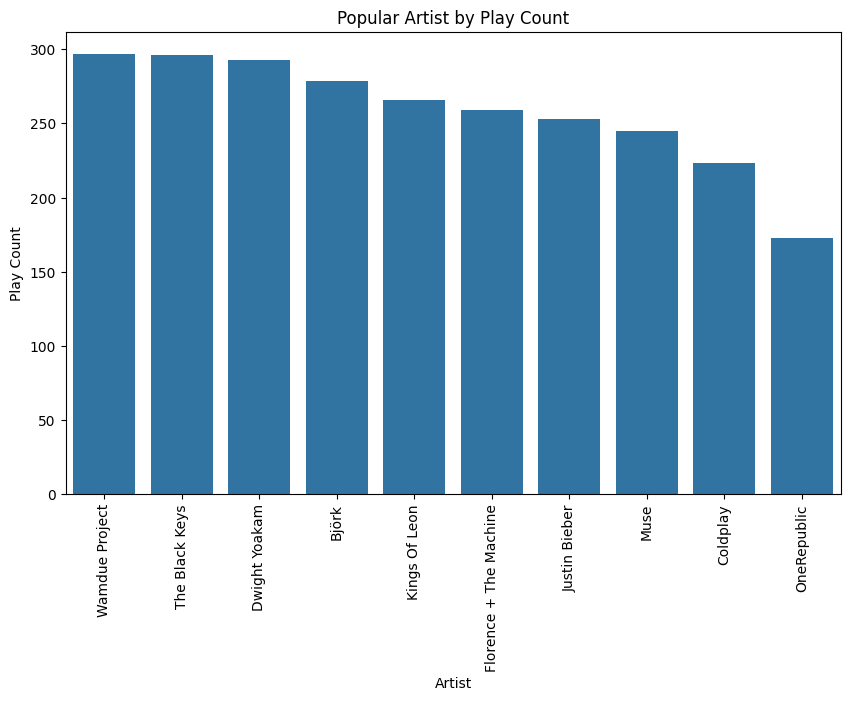

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(data=artist_pop.head(10), x='Artist', y='Total User')
plt.title('Popular Artist by Play Count')
plt.xlabel('Artist')
plt.ylabel('Play Count')
plt.xticks(rotation=90)
plt.show()

Popular Songs by Playcount

In [77]:
popular = merged_df[['artist_name','song','play_count']]

song_pop = popular.pivot_table(values=['play_count'],index = ['artist_name','song'] ,aggfunc = 'sum')

song_pop = song_pop.sort_values(by='play_count',ascending=False)

song_pop = song_pop.reset_index()

song_pop.head(10)

,artist_name,song,play_count
0,Wamdue Project,King Of My Castle [Nicola Fasano & Steve Fores...,297
1,Dwight Yoakam,You're The One,293
2,Björk,Undo,275
3,Muse,Dead Star [Live From Le Zenith],181
4,Florence + The Machine,Dog Days Are Over (Radio Edit),167
5,The Black Keys,Every Lasting Light,162
6,Neil Young,Love And Only Love (1991 Live LP Version),154
7,Sisters Of Mercy,More,146
8,Five Iron Frenzy,Canada,125
9,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,123


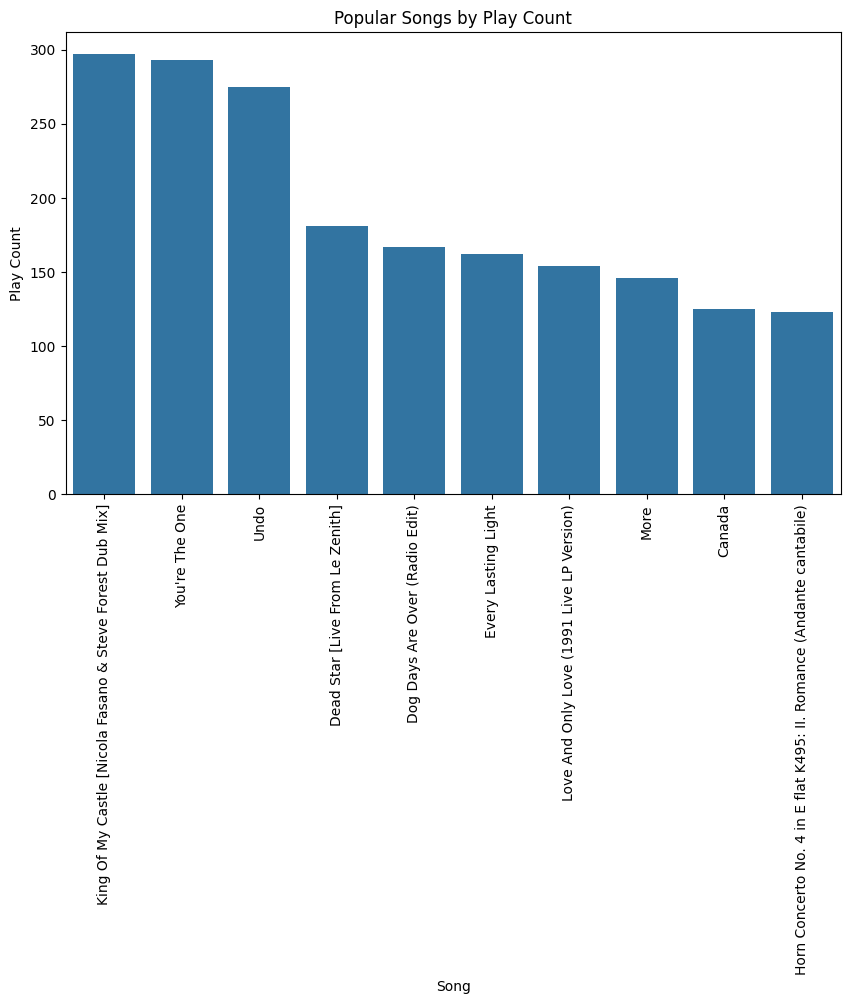

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(data=song_pop.head(10), x='song', y='play_count')
plt.title('Popular Songs by Play Count')
plt.xlabel('Song')
plt.ylabel('Play Count')
plt.xticks(rotation=90)
plt.show()

Popular Songs by Unique User Count

In [79]:
popular = merged_df[['artist_name','song','play_count','user_id']]

unique_user_count = popular.groupby(['song'])['user_id'].nunique()

song_pop_unique = unique_user_count.sort_values(ascending=False)

song_pop_unique = song_pop_unique.reset_index()

song_pop_unique.head(10)

,song,user_id
0,Undo,38
1,You're The One,31
2,Revelry,27
3,Sehr kosmisch,27
4,Secrets,27
5,Dog Days Are Over (Radio Edit),23
6,Horn Concerto No. 4 in E flat K495: II. Romanc...,20
7,Tive Sim,20
8,OMG,19
9,Représente,18


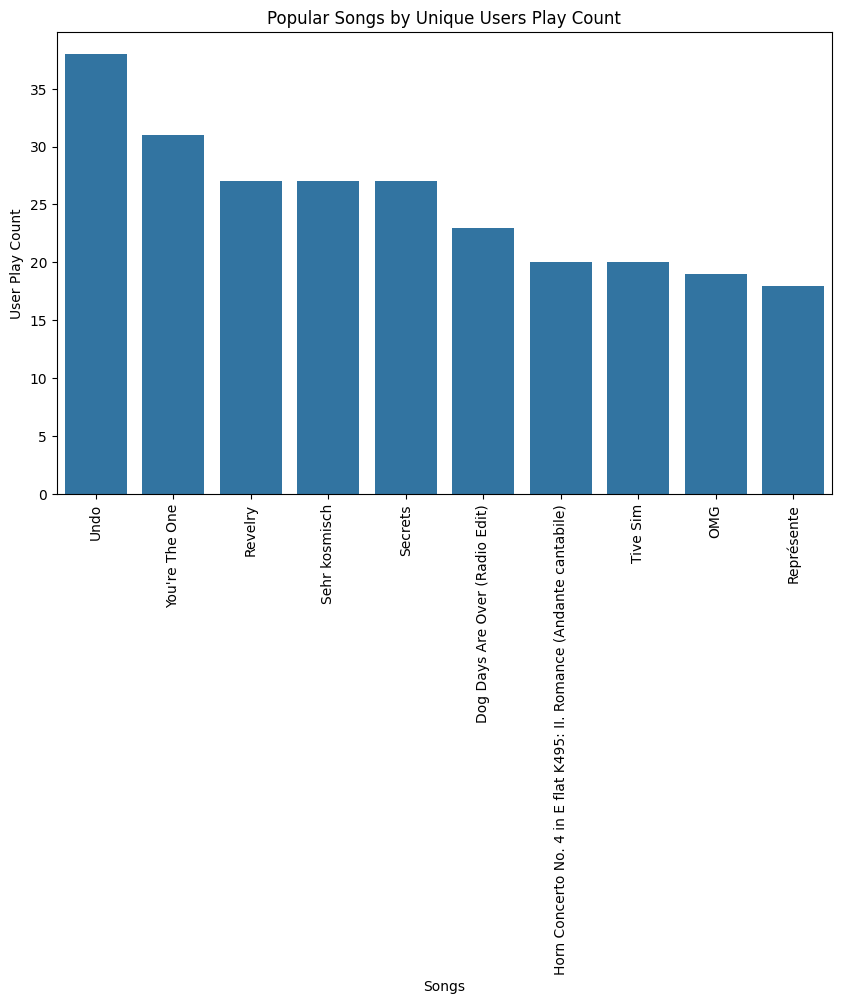

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(data=song_pop_unique.head(10), x='song', y='user_id')
plt.title('Popular Songs by Unique Users Play Count')
plt.xlabel('Songs')
plt.ylabel('User Play Count')
plt.xticks(rotation=90)
plt.show()

What Users Listen the Most and their playcounts

In [81]:
popular= merged_df[['artist_name','song','play_count','user_id']]

unique_user_count = popular.groupby(['user_id'])['song'].nunique()

user_pop = unique_user_count.sort_values(ascending=False)

user_pop = user_pop.reset_index()

user_pop.head(10)

,user_id,song
0,MARY M,4
1,cc8d8ca199ffce6db4e32df04a56cefd5180305a,4
2,NIK B,4
3,f5e1c68893651baa455095c420ea5070620031da,3
4,00ddea4c1acbef003682504b04062880bafbf249,3
5,750326f11ee134783cacb216d7f06b7f705a7769,3
6,d43a2126b033ff6dc2f88363d026ae33123b0a20,3
7,e272a572566d8006c0c4a299a56d69d6acd59b74,3
8,2228a0079a7c0cacc48bcb9f7b0c7385738b59ce,3
9,284bba5767449a090ec52f1c4c98ab8a961e4096,3


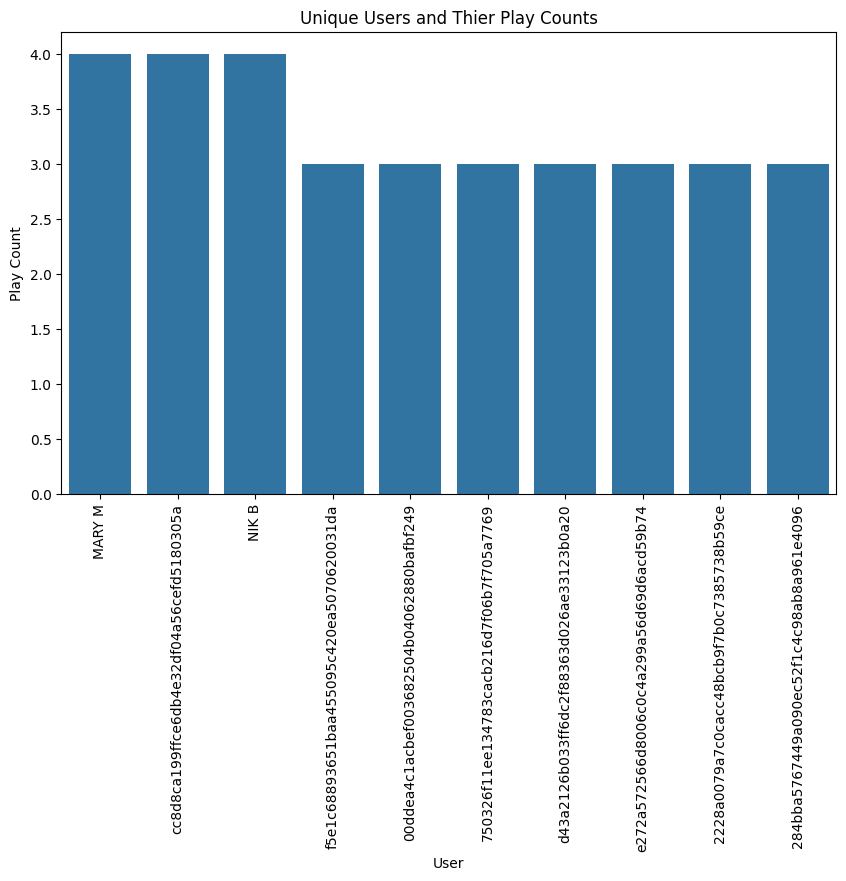

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(data=user_pop.head(10), x='user_id', y='song')
plt.title('Unique Users and Thier Play Counts')
plt.xlabel('User')
plt.ylabel('Play Count')
plt.xticks(rotation=90)
plt.show()

#BaselineOnly()

In [83]:
# Initialize Reader and Split
reader = Reader(rating_scale=(merged_df['play_count_binned'].min(),
                              merged_df['play_count_binned'].max()))
data = Dataset.load_from_df(merged_df[['user_id','song_id','play_count_binned']], reader)


# test set is made of 30% of the ratings.
trainset, testset = train_test_split(data,test_size=0.3)

In [84]:
print(f"user count. : {trainset.n_users}")
print(f"item count. : {trainset.n_items}")
print(f"rating count: {trainset.n_ratings}")
print(f"rating range: {trainset.rating_scale}")

user count. : 6735
item count. : 5577
rating count: 7007
rating range: (1, 10)


In [85]:
# Define and train the BaselineOnly model
print("Evaluating Global Mean Baseline:")
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 5,
               'reg_i': 5}  # You can adjust these parameters
algo_global = BaselineOnly(bsl_options=bsl_options)
algo_global.fit(trainset)
# Predict ratings for the testset
predictions_global = algo_global.test(testset)
# Compute and print RMSE
rmse_global = accuracy.rmse(predictions_global)
# Compute and print MAE
mae_global = accuracy.mae(predictions_global)

Evaluating Global Mean Baseline:
Estimating biases using als...
RMSE: 2.5584
MAE:  1.9063


In [86]:
# Define and evaluate the user mean baseline
print("Evaluating User Mean Baseline:\n")
bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 5,     # Regular user regularization
    'reg_i': 100    # High item regularization to diminish item bias
}

#algo_user = BaselineOnly(bsl_options=bsl_options)
algo_user = BaselineOnly(bsl_options=bsl_options)
algo_user.fit(trainset)
# Predict ratings for the testset
predictions = algo_user.test(testset)
# Compute and print RMSE
rmse = accuracy.rmse(predictions)
# Compute and print MAE
mae = accuracy.mae(predictions)

Evaluating User Mean Baseline:

Estimating biases using als...
RMSE: 2.5519
MAE:  1.8946


In [87]:
# Define and evaluate the ITEM mean baseline
print("\nEvaluating Item Mean Baseline:\n")

bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 100,  # High user regularization to diminish user bias
    'reg_i': 5     # Regular item regularization
}
algo_item = BaselineOnly(bsl_options=bsl_options)
algo_item.fit(trainset)
# Predict ratings for the testset
predictions = algo_item.test(testset)
# Compute and print RMSE
rmse = accuracy.rmse(predictions)
# Compute and print MAE
mae = accuracy.mae(predictions)


Evaluating Item Mean Baseline:

Estimating biases using als...
RMSE: 2.5684
MAE:  1.9142


#SVD

In [88]:
# Use the SVD algorithm
svd_model = SVD()

# Train the algorithm on the trainset
svd_model.fit(trainset)

# Access properties
user_factors = svd_model.pu
item_factors = svd_model.qi
user_biases = svd_model.bu
item_biases = svd_model.bi
global_mean = trainset.global_mean

# You can now analyze these properties, such as their shapes, distributions, etc.
print("User factors shape:", user_factors.shape)
print("Item factors shape:", item_factors.shape)

User factors shape: (6735, 100)
Item factors shape: (5577, 100)


In [89]:
print("Evaluating SVD recomender model:\n")
# make predicitons
test_predictions = svd_model.test(testset)
# Compute and print RMSE
rmse = accuracy.rmse(test_predictions)

# Compute and print MAE
mae = accuracy.mae(test_predictions)

print("Evaluating SVD:\n")
print(f"RMSE: {rmse:.4f} ")
print(f"MAE: {mae:.4f} ")

Evaluating SVD recomender model:

RMSE: 2.5551
MAE:  1.9039
Evaluating SVD:

RMSE: 2.5551 
MAE: 1.9039 


In [90]:
from surprise.model_selection import GridSearchCV

param_grid = {
    'n_factors': [25, 50, 75],
    'n_epochs': [5, 10, 15],
    'lr_all': [0.005, 0.01,0.1],
    'reg_all': [0.02, 0.05, 0.1]
}

gs = GridSearchCV(SVD, param_grid, measures=['RMSE', 'MAE'], cv=3)
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

2.546045326346988
{'n_factors': 75, 'n_epochs': 15, 'lr_all': 0.005, 'reg_all': 0.05}


In [91]:
results = gs.cv_results
# Convert the dictionary into a Pandas DataFrame
results_df = pd.DataFrame.from_dict(results)

# Filter the DataFrame to show only the relevant columns
relevant_columns = ['param_n_factors', 'param_n_epochs', 'param_lr_all', 'param_reg_all', 'mean_test_rmse', 'mean_test_mae']
results_df = results_df[relevant_columns]

# Print the DataFrame
results_df

,param_n_factors,param_n_epochs,param_lr_all,param_reg_all,mean_test_rmse,mean_test_mae
0,25,5,0.005,0.02,2.549838,1.887332
1,25,5,0.005,0.05,2.549969,1.887345
2,25,5,0.005,0.10,2.549741,1.887243
3,25,5,0.010,0.02,2.547208,1.887674
4,25,5,0.010,0.05,2.547387,1.887795
...,...,...,...,...,...,...
76,75,15,0.010,0.05,2.546954,1.888012
77,75,15,0.010,0.10,2.547787,1.888184
78,75,15,0.100,0.02,2.557178,1.883435
79,75,15,0.100,0.05,2.555904,1.881986


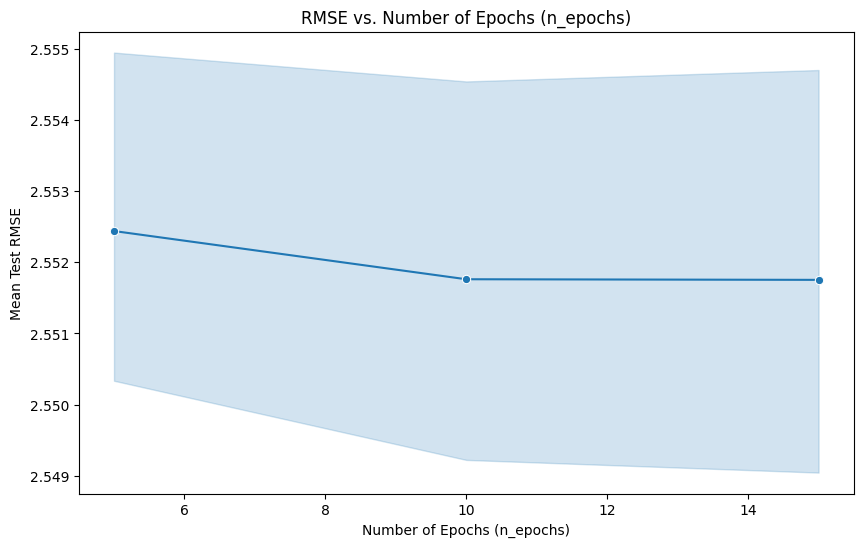

In [92]:
filtered_df = results_df[results_df['param_n_factors'] != 100]  # Example filter

# Creating the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='param_n_epochs', y='mean_test_rmse', marker='o')
plt.title('RMSE vs. Number of Epochs (n_epochs)')
plt.xlabel('Number of Epochs (n_epochs)')
plt.ylabel('Mean Test RMSE')
plt.show()

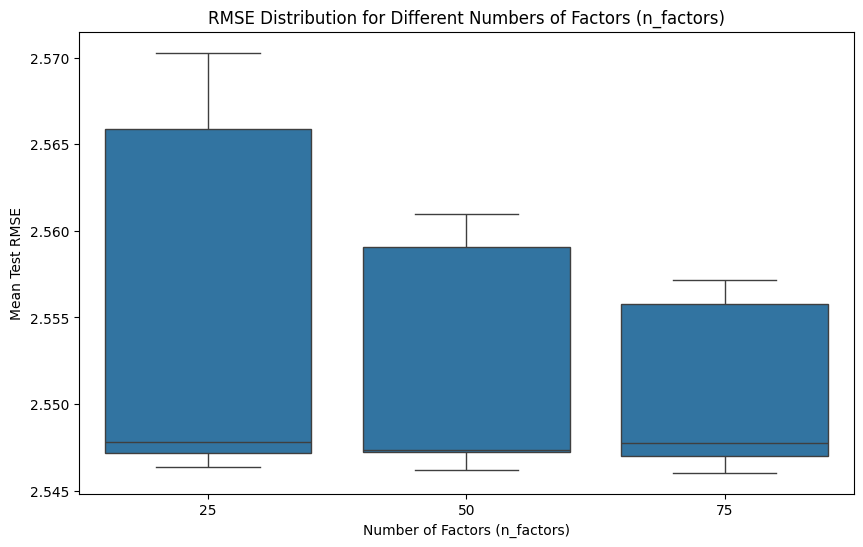

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='param_n_factors', y='mean_test_rmse')
plt.title('RMSE Distribution for Different Numbers of Factors (n_factors)')
plt.xlabel('Number of Factors (n_factors)')
plt.ylabel('Mean Test RMSE')
plt.show()

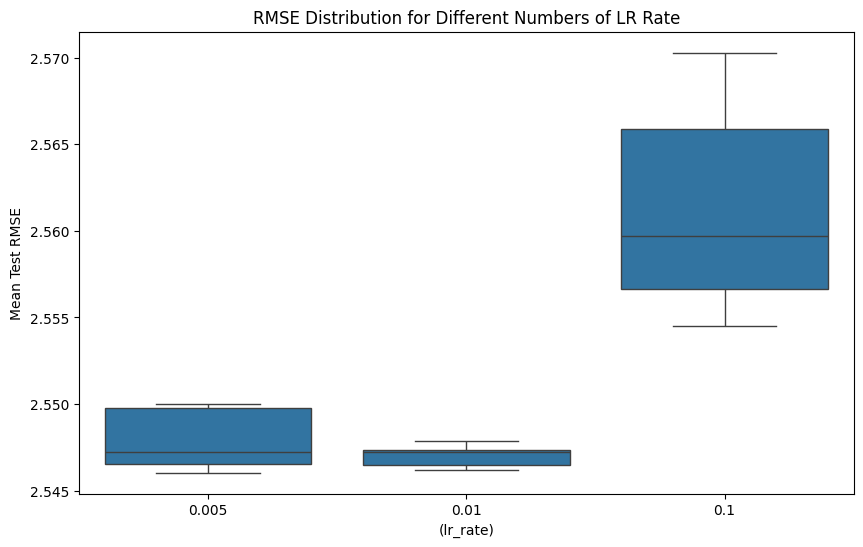

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='param_lr_all', y='mean_test_rmse')
plt.title('RMSE Distribution for Different Numbers of LR Rate')
plt.xlabel('(lr_rate)')
plt.ylabel('Mean Test RMSE')
plt.show()

#Fit Best Model

In [95]:
best_params = gs.best_params['rmse']
print(best_params)
svd_model = SVD(n_factors=best_params['n_factors'], n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
svd_model.fit(trainset)

print("Evaluating SVD recomender model:\n")
# make predicitons
test_predictions = svd_model.test(testset)
# Compute and print RMSE
rmse = accuracy.rmse(test_predictions)

# Compute and print MAE
mae = accuracy.mae(test_predictions)

print("Evaluating SVD:\n")
print(f"RMSE: {rmse:.4f} ")
print(f"MAE: {mae:.4f} ")

{'n_factors': 75, 'n_epochs': 15, 'lr_all': 0.005, 'reg_all': 0.05}
Evaluating SVD recomender model:

RMSE: 2.5547
MAE:  1.9039
Evaluating SVD:

RMSE: 2.5547 
MAE: 1.9039 


Global Baseline:
RMSE: 2.5584
MAE:  1.9063

User Mean Baseline:
RMSE: 2.5519
MAE:  1.8946

Item Mean Baseline:
RMSE: 2.5684
MAE:  1.9142

Tuned SVD Model Error:
RMSE: 2.5547
MAE: 1.9039

#Make Recommendations

In [96]:
def get_top_n_recommendations(user_id, data, model, n=10):
    # 1. Identify all unique songs in the dataset
    all_songs = data.df['song_id'].unique()

    # 2. Filter out songs that the user has already listened to
    already_listened_songs = data.df[data.df['user_id'] == user_id]['song_id'].unique()
    songs_to_predict = np.setdiff1d(all_songs, already_listened_songs)

    # 3. Use the model to predict the play count for these songs
    predictions = [svd_model.predict(user_id, song_id).est for song_id in songs_to_predict]

    # 4. Combine songs and predictions into a list of tuples and sort them
    song_predictions = list(zip(songs_to_predict, predictions))
    song_predictions.sort(key=lambda x: x[1], reverse=True)

    # Return the top n songs
    return song_predictions[:n]

# Example usage
user_id = 'NIK B'  # replace with the user ID
top_song = get_top_n_recommendations(user_id, data, svd_model, n=10)
print(f"Top 10 Song Recommendations for : {user_id}")

for song_id, predicted_rating in top_song:
    print(f"{song_id}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : NIK B
SOBONKR12A58A7A7E0: 5.7966
SONJQNM12AC468D243: 5.5228
SOPUCYA12A8C13A694: 5.4331
SOAUWYT12A81C206F1: 5.3774
SOWRREB12A6D4FA7CB: 5.3132
SOBDETW127D9786130: 5.3088
SOPPROJ12AB0184E18: 5.2518
SOWHYSP12A8C142A21: 5.2284
SOWYFFH12AAF3B4C65: 5.2243
SOLODLE12AF72A4452: 5.2127


Look at Song Recommendations

In [97]:
pred = pd.DataFrame(top_song, columns=["song_id", "play_count"])
merged_pred = pd.merge(pred, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred

,song_id,play_count,track_id,artist_name,song
0,SOBONKR12A58A7A7E0,5.796612,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,SONJQNM12AC468D243,5.522778,TRHEWUH12903CE7962,UK Subs,One of the Girls
2,SOPUCYA12A8C13A694,5.433090,TRFQOSP128F427C2B2,Five Iron Frenzy,Canada
3,SOAUWYT12A81C206F1,5.377395,TRGXQES128F42BA5EB,Björk,Undo
4,SOWRREB12A6D4FA7CB,5.313175,TRMAJLS128E0780D0F,N.E.R.D.,Rock Star
5,SOBDETW127D9786130,5.308795,TRVQKKB128F92CDE51,Don Omar / Mackie Ranks,En Su Nota
6,SOPPROJ12AB0184E18,5.251846,TRDFZTB12903CF1CBD,Kid Cudi / MGMT / Ratatat,Pursuit Of Happiness (nightmare)
7,SOWHYSP12A8C142A21,5.228419,TRCJSOI128F92EB948,New Order,Let's Go [from 'Salvation']
8,SOWYFFH12AAF3B4C65,5.224305,TRDWGNK128F92DE22A,Taylor Swift / Colbie Caillat,Breathe
9,SOLODLE12AF72A4452,5.212736,TROSTVZ128F931F9F4,Last House On The Left,Overature of the Maleficia


#Question 1: For a random sample of 5 users with 10 or more song plays make 5 recommendations of songs they have not listened to with your SVD

In [98]:
import random

for user_id in merged_df['user_id'].value_counts().sample(n=5,random_state=1).where(merged_df['play_count']>=10).index:
  top_songs = get_top_n_recommendations(user_id, data, svd_model, n=5)
  print(f"-- Top 5 Song Recommendations for : {user_id} -- ")
  for song, predicted_rating in top_songs:
      print(f"{song}: {predicted_rating:.4f}")
  print("\n")

-- Top 5 Song Recommendations for : b15e0b8804895439af65ba53391be872f0462601 -- 
SOBONKR12A58A7A7E0: 4.1068
SOPUCYA12A8C13A694: 3.6474
SOAUWYT12A81C206F1: 3.6091
SOPPROJ12AB0184E18: 3.4670
SORUFVF12AB018230B: 3.3998


-- Top 5 Song Recommendations for : 5d4a0b37362ebbb892f0731b736acfc11fce3541 -- 
SOBONKR12A58A7A7E0: 4.1616
SOAUWYT12A81C206F1: 3.8181
SOPUCYA12A8C13A694: 3.6881
SOLODLE12AF72A4452: 3.5661
SOPPROJ12AB0184E18: 3.5041


-- Top 5 Song Recommendations for : 0e1d47d39d55746dbc078985e3cf4d6e7cd61cc3 -- 
SOBONKR12A58A7A7E0: 4.1727
SOHXWUX12AB01821DC: 3.6174
SOPUCYA12A8C13A694: 3.6028
SOLODLE12AF72A4452: 3.5130
SOAUWYT12A81C206F1: 3.4403


-- Top 5 Song Recommendations for : 50b5e3973ba7fdd0e49bf642473cb27d08e51042 -- 
SOBONKR12A58A7A7E0: 4.3276
SOAUWYT12A81C206F1: 3.8963
SOPUCYA12A8C13A694: 3.8616
SOLODLE12AF72A4452: 3.8039
SOPPROJ12AB0184E18: 3.6995


-- Top 5 Song Recommendations for : adeb20423db757f1c411e186f388037dacd2084f -- 
SOAUWYT12A81C206F1: 4.0329
SOPUCYA12A8C13A694: 

#Question 2: Recommendation systems should provide “relevant” recommendations expanding the user’s pool of options (songs in our case) what would you do to improve your recommendation to expand a user’s relevant song recommendation pool?

To improve recommendations for a user and expand their relevant song recommendation pool, I would use more content-based filtering to introduce content that may not follow the latent factors that the model learns on its own, but will provide recommendations that are much more similar to the user's usual listening.  Although content-based filtering may not have the randomness that a user is accustomed to, it would be much more relevant to their current listening habits.

> Indented block



#Question 3: What are your top 10 recommendations for a net new user? That is a user with no user/song play count? essentially the cold start problem.

Attempt at Trying Content-Based Recommendation, but no categories to really group on

In [118]:
q_3_merged_df = pd.merge(df, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
q_3_merged_df.head()

#songs = pd.read_csv('https://raw.githubusercontent.com/MonkeyWrenchGang/2024_BAN6053/main/beer_content_recomender.csv')
# beer.head()
#q_3_merged_df['brewery_name'] = beer['brewery_name'].fillna("unknown")
#beer_types = ['American Pale Lager','Light Lager','American Amber / Red Lager', 'American IPA']
#beer = beer.query("beer_style.isin(@beer_types)").reset_index(drop=True)
q_3_merged_df.shape

(10010, 7)

In [119]:
q_3_merged_df.columns

Index(['user_id', 'song_id', 'play_count', 'play_count_binned', 'track_id',
       'artist_name', 'song'],
      dtype='object')

In [120]:
# Define which columns are numerical and which are categorical
num_features = ['play_count']  # Numerical features
cat_features = ['play_count_binned']

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import cosine_similarity

class CosineSimilarityTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # No fitting necessary, just return self
        return self

    def transform(self, X):
        # Calculate and return the cosine similarity matrix
        return cosine_similarity(X)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define which columns are numerical and which are categorical
#num_features = ['aroma', 'appearance', 'taste', 'abv']
#cat_features = ['beer_style']

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)

# Update the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Normalize and encode features
    ('cosine_sim', CosineSimilarityTransformer())  # Compute cosine similarity
])

In [122]:
# Assuming X is your feature matrix
X_scaled_and_similarity = pipeline.fit_transform(q_3_merged_df)
X_scaled_and_similarity.shape

(10010, 10010)

In [123]:
import joblib
joblib.dump(pipeline, 'q_3_pipeline.pkl')
joblib.dump(X_scaled_and_similarity, 'X_scaled_and_similarity.pkl')

['X_scaled_and_similarity.pkl']

In [124]:
def make_recommendation(target_index, cosine_sim_matrix, items, top_n=5):
    """
    Make a recommendation for a given item index.

    Parameters:
    target_index (int): Index of the target item (beer) in the dataset.
    cosine_sim_matrix (numpy.ndarray): Computed cosine similarity matrix.
    items (pandas.Series): Series containing the item names.
    top_n (int): Number of top recommendations to return.

    Returns:
    list: Top N recommended item names.
    """
    # Get similarity scores for the target item with all items
    sim_scores = list(enumerate(cosine_sim_matrix[target_index]))

    # Sort the items based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Select the top N items, excluding the first one as it is the item itself
    top_items_indices = [i[0] for i in sim_scores[1:top_n+1]]

    # Get the item names corresponding to the top indices
    recommended_items = items.iloc[top_items_indices]

    return recommended_items.tolist()

def get_recommendation(target_song):
  target_songs_index = q_3_merged_df.index[q_3_merged_df['song'] == similar_to_song].tolist()[0]
  recommended_song = make_recommendation(target_songs_index, X_scaled_and_similarity, q_3_merged_df['song'], top_n=5)
  print(f"Recommended Songs similar to {target_song}")
  for song_name in recommended_song:
    print(f"- {song_name}")

similar_to_song = 'One'
get_recommendation(similar_to_song)

Recommended Songs similar to One
- Pursuit Of Happiness (nightmare)
- Sehr kosmisch
- Sembrando En El Mar
- Time Flies
- People Who Died ( LP Version )


In [125]:
#similar_to_song = 'Ace of Spades'
get_recommendation('Ace of Spades')
#similar_to_song = 'Drops of Jupiter'
get_recommendation("Drops of Jupiter")

Recommended Songs similar to Ace of Spades
- Pursuit Of Happiness (nightmare)
- Sehr kosmisch
- Sembrando En El Mar
- Time Flies
- People Who Died ( LP Version )
Recommended Songs similar to Drops of Jupiter
- Pursuit Of Happiness (nightmare)
- Sehr kosmisch
- Sembrando En El Mar
- Time Flies
- People Who Died ( LP Version )


In [126]:
for s in q_3_merged_df.nlargest(10,'play_count')['song'].tolist():
  get_recommendation(s)

Recommended Songs similar to King Of My Castle [Nicola Fasano & Steve Forest Dub Mix]
- Pursuit Of Happiness (nightmare)
- Sehr kosmisch
- Sembrando En El Mar
- Time Flies
- People Who Died ( LP Version )
Recommended Songs similar to Dead Star [Live From Le Zenith]
- Pursuit Of Happiness (nightmare)
- Sehr kosmisch
- Sembrando En El Mar
- Time Flies
- People Who Died ( LP Version )
Recommended Songs similar to Every Lasting Light
- Pursuit Of Happiness (nightmare)
- Sehr kosmisch
- Sembrando En El Mar
- Time Flies
- People Who Died ( LP Version )
Recommended Songs similar to More
- Pursuit Of Happiness (nightmare)
- Sehr kosmisch
- Sembrando En El Mar
- Time Flies
- People Who Died ( LP Version )
Recommended Songs similar to Love And Only Love (1991 Live LP Version)
- Pursuit Of Happiness (nightmare)
- Sehr kosmisch
- Sembrando En El Mar
- Time Flies
- People Who Died ( LP Version )
Recommended Songs similar to Szex & KV
- Pursuit Of Happiness (nightmare)
- Sehr kosmisch
- Sembrando En

#Question 3: Most Likely Solution to Cold Start

In [108]:
merged_df.head()

,user_id,song_id,play_count,play_count_binned,track_id,artist_name,song
0,e9537d16ab7d6ef5d60c81bceae6ee80f06ee05c,SOJYNZE12AF72AC894,1,1,TRNHPMU12903CDFC76,Decapitated,Nine Steps
1,dae04733be8470fecad5dfa05032ad73fd232d8c,SOBZMWE12B0B80AEA4,3,3,TRAPAYS128E0793CCD,S Club 7,You're My Number One
2,0a13ef57b89295c0f05ce3d1d7991e4d50edb04c,SOIMRLG12A6D4F5031,1,1,TRDHSJV128EF3550B6,Erin McKeown,Lullaby In Three/Four
3,70f60a88c6d92e6ac6a26dcd79532744b8a2857f,SOMGIYR12AB0187973,1,1,TRWSDEV128F93119BF,Panic At The Disco,Behind The Sea [Live In Chicago]
4,43870977dd4bca6262159d589f48eec1e18b3427,SONJILQ12A67020456,1,1,TRYZVGG128F146D706,Red Hot Chili Peppers,Californication (Album Version)


In [115]:
cold_start = (merged_df.groupby(['artist_name','song']).agg({'play_count':['mean','count']}).reset_index()
.nlargest(10,('play_count','count')).reset_index())
cold_start

index                                        artist_name  \
                                                             
0   804                                              Björk   
1  1974                                      Dwight Yoakam   
2  2798                                           Harmonia   
3  3652                                      Kings Of Leon   
4  4907                                        OneRepublic   
5  2427                             Florence + The Machine   
6   609  Barry Tuckwell/Academy of St Martin-in-the-Fie...   
7  1249                                            Cartola   
8  7179                          Usher featuring will.i.am   
9   275                                    Alliance Ethnik   

                                                song play_count        
                                                           mean count  
0                                               Undo   7.236842    38  
1                                     You're The One   9.766667    30  
2                                      Sehr kosmisch   2.962963    27  
3                                            Revelry   4.481481    27  
4                                            Secrets   2.851852    27  
5                     Dog Days Are Over (Radio Edit)   7.260870    23  
6  Horn Concerto No. 4 in E flat K495: II. Romanc...   6.150000    20  
7                                           Tive Sim   1.550000    20  
8                                                OMG   2.894737    19  
9                                         Représente   3.388889    18

#Question 4: What are your top 10 recommendations for you and your peer?
  ## Do the recommendations make sense? What could you do to improve them? Do you think an Item based KNN might better?


To improve recommendations, I would suggest introducing a hybrid model between collaborative filtering and content-baed filtering- such as the SVD that I created and a KNN model.  The SVD is very good at finding some latent factors that are not clearly defined and connecting them to new recommendations.  On the other hand, the KNN or content-based recommendation models are much better at connecting similar songs based on the definied characteristics.

In [110]:
# My Recommendations

user_id = 'NIK B'  # replace with the user ID
top_song = get_top_n_recommendations(user_id, data, svd_model, n=10)
print(f"Top 10 Song Recommendations for : {user_id}")

for song_id, predicted_rating in top_song:
    print(f"{song_id}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : NIK B
SOBONKR12A58A7A7E0: 5.7966
SONJQNM12AC468D243: 5.5228
SOPUCYA12A8C13A694: 5.4331
SOAUWYT12A81C206F1: 5.3774
SOWRREB12A6D4FA7CB: 5.3132
SOBDETW127D9786130: 5.3088
SOPPROJ12AB0184E18: 5.2518
SOWHYSP12A8C142A21: 5.2284
SOWYFFH12AAF3B4C65: 5.2243
SOLODLE12AF72A4452: 5.2127


In [111]:
pred = pd.DataFrame(top_song, columns=["song_id", "play_count"])
merged_pred = pd.merge(pred, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred

,song_id,play_count,track_id,artist_name,song
0,SOBONKR12A58A7A7E0,5.796612,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,SONJQNM12AC468D243,5.522778,TRHEWUH12903CE7962,UK Subs,One of the Girls
2,SOPUCYA12A8C13A694,5.433090,TRFQOSP128F427C2B2,Five Iron Frenzy,Canada
3,SOAUWYT12A81C206F1,5.377395,TRGXQES128F42BA5EB,Björk,Undo
4,SOWRREB12A6D4FA7CB,5.313175,TRMAJLS128E0780D0F,N.E.R.D.,Rock Star
5,SOBDETW127D9786130,5.308795,TRVQKKB128F92CDE51,Don Omar / Mackie Ranks,En Su Nota
6,SOPPROJ12AB0184E18,5.251846,TRDFZTB12903CF1CBD,Kid Cudi / MGMT / Ratatat,Pursuit Of Happiness (nightmare)
7,SOWHYSP12A8C142A21,5.228419,TRCJSOI128F92EB948,New Order,Let's Go [from 'Salvation']
8,SOWYFFH12AAF3B4C65,5.224305,TRDWGNK128F92DE22A,Taylor Swift / Colbie Caillat,Breathe
9,SOLODLE12AF72A4452,5.212736,TROSTVZ128F931F9F4,Last House On The Left,Overature of the Maleficia


In [112]:
# Peer Recommendations

user_id = 'MARY M'  # replace with the user ID
top_song = get_top_n_recommendations(user_id, data, svd_model, n=10)
print(f"Top 10 Song Recommendations for : {user_id}")

for song_id, predicted_rating in top_song:
    print(f"{song_id}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : MARY M
SOBONKR12A58A7A7E0: 6.1717
SOAUWYT12A81C206F1: 5.7738
SOLODLE12AF72A4452: 5.6205
SOSXLTC12AF72A7F54: 5.5601
SOJTLUY12A58A7D1E3: 5.4180
SOHXWUX12AB01821DC: 5.3806
SOWYFFH12AAF3B4C65: 5.3474
SOPUCYA12A8C13A694: 5.3185
SOAXGDH12A8C13F8A1: 5.3099
SOMGIYR12AB0187973: 5.2918


In [113]:
pred = pd.DataFrame(top_song, columns=["song_id", "play_count"])
merged_pred = pd.merge(pred, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred

,song_id,play_count,track_id,artist_name,song
0,SOBONKR12A58A7A7E0,6.171651,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,SOAUWYT12A81C206F1,5.773820,TRGXQES128F42BA5EB,Björk,Undo
2,SOLODLE12AF72A4452,5.620513,TROSTVZ128F931F9F4,Last House On The Left,Overature of the Maleficia
3,SOSXLTC12AF72A7F54,5.560140,TRONYHY128F92C9D11,Kings Of Leon,Revelry
4,SOJTLUY12A58A7D1E3,5.417960,TRNXTXH128F92FF599,Shakira,Loba
5,SOHXWUX12AB01821DC,5.380633,TRXUGZN128F931EDA1,Delerium feat. Sarah McLachlan,Silence
6,SOWYFFH12AAF3B4C65,5.347402,TRDWGNK128F92DE22A,Taylor Swift / Colbie Caillat,Breathe
7,SOPUCYA12A8C13A694,5.318505,TRFQOSP128F427C2B2,Five Iron Frenzy,Canada
8,SOAXGDH12A8C13F8A1,5.309874,TRHKJNX12903CEFCDF,Florence + The Machine,Dog Days Are Over (Radio Edit)
9,SOMGIYR12AB0187973,5.291817,TRWSDEV128F93119BF,Panic At The Disco,Behind The Sea [Live In Chicago]


In [117]:
#Convert to HTML
#%%shell
#jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 1- Music Recommender/Baldis_Nik_Project_1.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 1- Music Recommender/Baldis_Nik_Project_1.ipynb to html
[NbConvertApp] Writing 1254879 bytes to /content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 1- Music Recommender/Baldis_Nik_Project_1.html
